In [1]:
import numpy as np
from scipy import signal
import pandas as pd
import pickle

import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

import util

In [2]:
df = pd.read_csv('features/feature_train.csv')
feature_col = df.drop(labels=['apn', 'file', 'group'], axis=1).columns
train_df = pd.read_csv('resources/File_train.csv')

In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20, 20, 20), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
acc_train, acc_val = util.model_evaluation_CV(mlp, df, train_df, feature_col, normalize=True)
print(f'Baseline performance: {acc_train:.3f} for training, {acc_val:.3f} for validation')


Baseline performance: 0.885 for training, 0.829 for validation


In [4]:
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    random_state=123)
acc_train, acc_val = util.model_evaluation_CV(mlp, df, train_df, feature_col, normalize=True)
print(f'Baseline performance: {acc_train:.3f} for training, {acc_val:.3f} for validation')


Baseline performance: 0.879 for training, 0.828 for validation


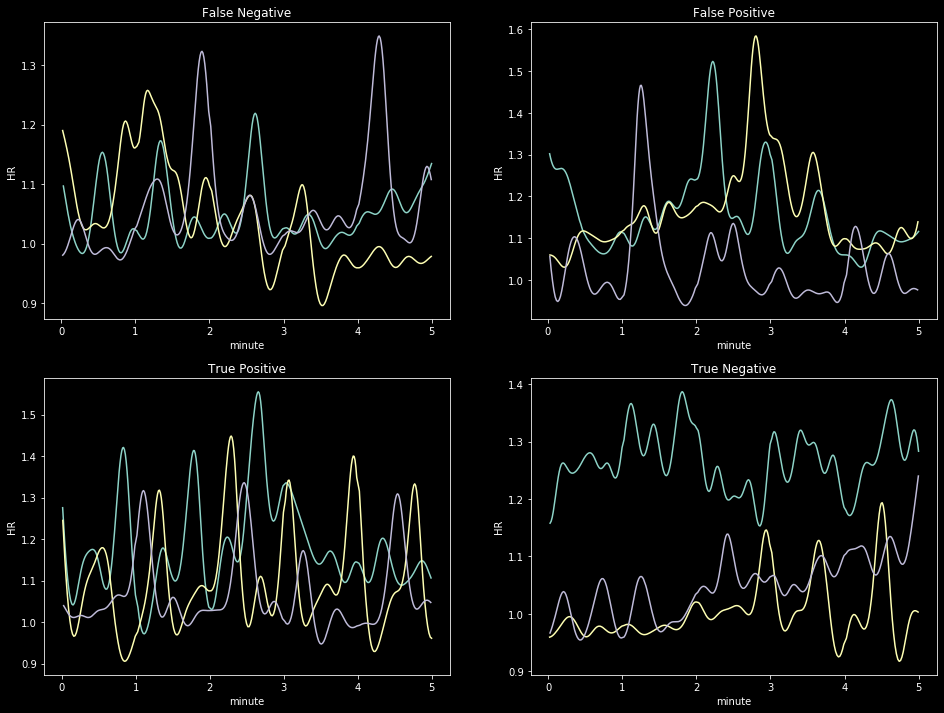

In [20]:
file = 'a15'
with open('features/HR_' + file + '.pkl', 'rb') as f:
    data = pickle.load(f)

b, a = signal.butter(3, 0.1)
t, hr = data['t'], data['hr']
idx_valid = (hr < 2) & (hr > 0.5)
hr, t = hr[idx_valid], t[idx_valid]
hr_smth = signal.filtfilt(b, a, hr)

res = np.transpose(seg_pred[file])
assert res.shape[0] == np.ceil(t[-1]) - 4

select_num = 3

plt.figure(figsize=(16, 12))
for case in range(4):
    if case == 0:
        val = [1, 0]
        label = 'False Negative'
    elif case == 1:
        val = [0, 1]
        label = 'False Positive'
    elif case == 2:
        val = [1, 1]
        label = 'True Positive'
    elif case == 3:
        val = [0, 0]
        label = 'True Negative'
        
    idx = np.where((res == val).all(axis=1))[0]
    idx_plot = np.random.choice(idx, select_num)
    
    plt.subplot(2, 2, case + 1)
    for idx in idx_plot:
        idx_t = (t > idx) & (t < idx + 5)
        plt.plot(t[idx_t] - idx, hr_smth[idx_t])
        
    plt.title(label)
    plt.xlabel('minute')
    plt.ylabel('HR')
    
plt.show()